# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import MAGAN

2024-05-20 08:34:33.513975: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 08:34:33.517835: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 08:34:33.564483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 08:34:35.324914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


MAGAN is running on TensorFlow 2.16.1


In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
####tma.clear_directory()

#Converts old way of storing files to the new - if any
tma.change_old_files_to_new()

<><><><><><><><><><><><><><><><><><><><><><><>     Updates completed     <><><><><><><><><><><><><><><><><><><><><><><>


True

In [3]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="iris.csv", split = "even", percent_of_anchors = [0.35], random_state=6739, verbose = 0)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels) #MAGAN seems to be unable to run on any splits that make the features count different


In [4]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

2024-05-20 08:34:49.975576: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 08:34:49.975594: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 08:34:49.979973: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 08:34:49.980005: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 08:34:50.013168: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 08:34:50.019036: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 08:34:50.029554: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CP

In [5]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [6]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 459102


 Method        Lengths
--------      ----------
 SSMA:          44480
 DTA:          47490
 Nama:          4752
 SPUD:          229610
 DIG:          132770


----------------------       Splits      ----------------------
Total data of random: 125327

 random        Lengths
--------      ----------
 SSMA:          12560
 DTA:          12560
 Nama:          1257
 SPUD:          58820
 DIG:          40130


Total data of even: 38003

 even        Lengths
--------      ----------
 SSMA:          3410
 DTA:          3420
 Nama:          343
 SPUD:          20420
 DIG:          10410


Total data of skewed: 74550

 skewed        Lengths
--------      ----------
 SSMA:          10500
 DTA:          10500
 Nama:          1050
 SPUD:          21000
 DIG:          31500


Total d

# Visualization Tests

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from utils import subset_df, plot_in_fig

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

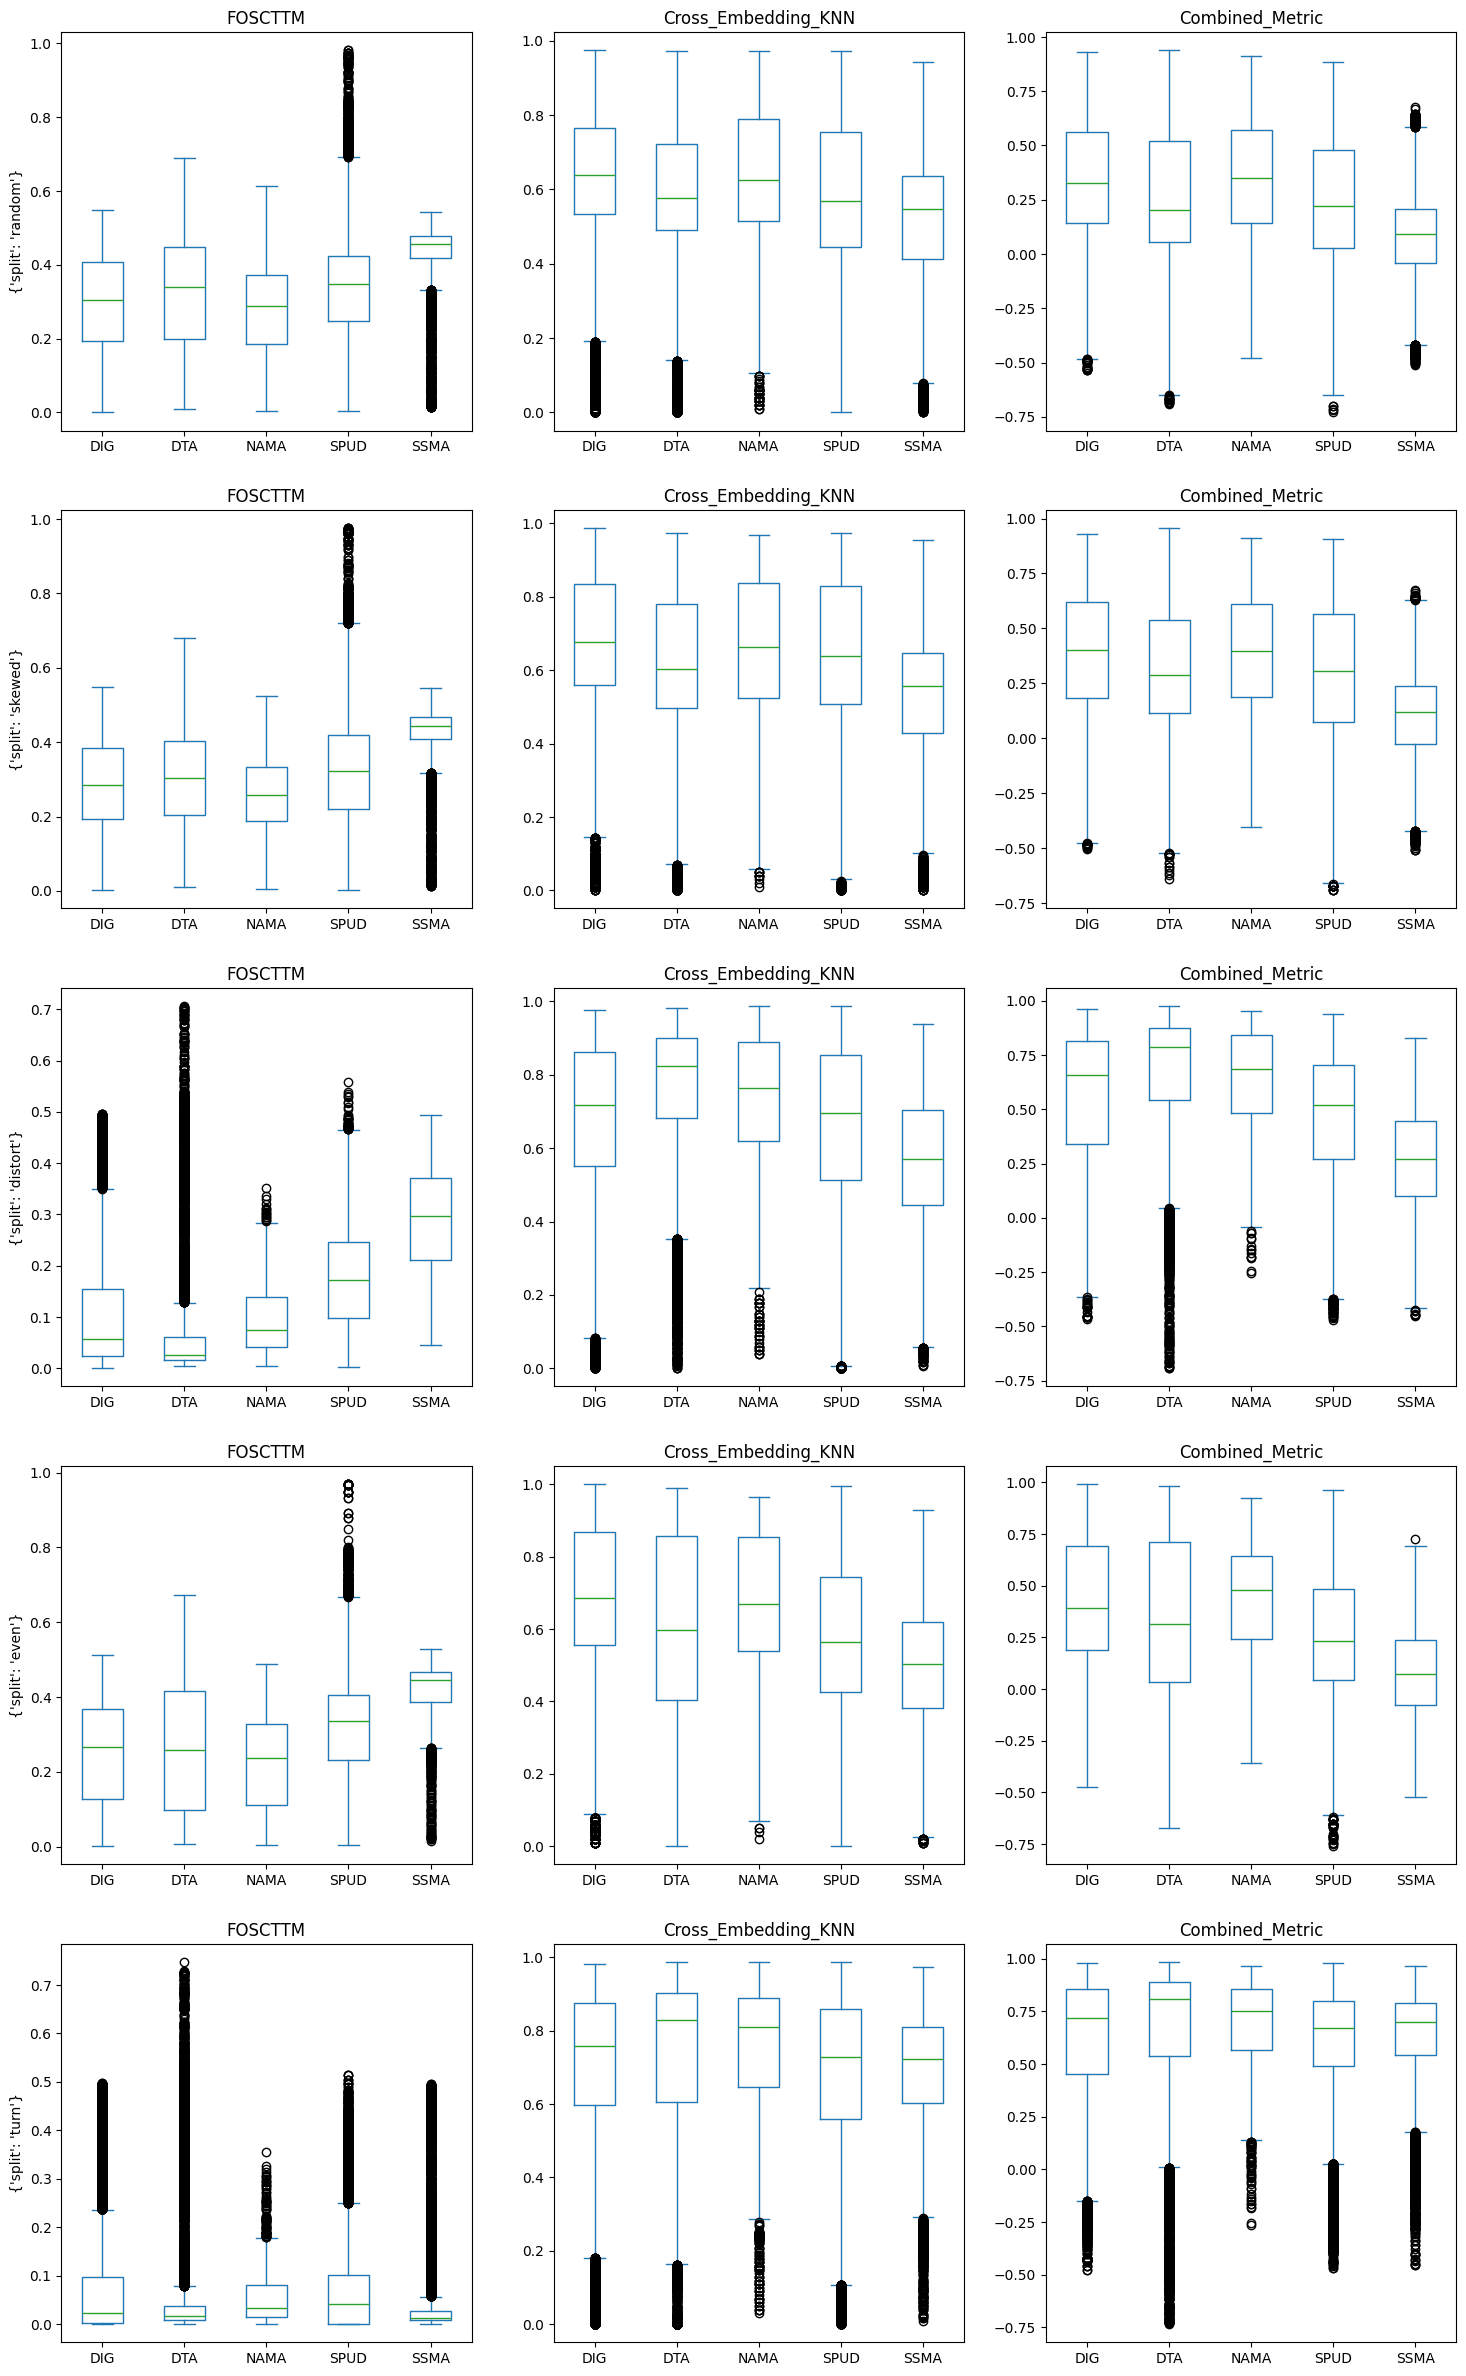

In [8]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [9]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [10]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
2599,heart_disease,DIG,7959,skewed,8.0,0.03,0.30,full,0.277979,NaN,NaN,0.268261,0.592593,0.324332
385289,iris,DIG,3329,turn,26.0,0.13,0.05,full,0.413118,NaN,NaN,0.267422,0.666667,0.399244
14646,heart_disease,DIG,8960,turn,56.0,0.19,0.10,None,0.542974,NaN,NaN,0.193699,0.585859,0.392160
222977,zoo,DIG,9817,turn,2.0,0.01,0.10,full,0.541207,NaN,NaN,0.138516,0.108911,-0.029605
19514,heart_disease,DIG,2009,random,14.0,0.05,0.30,None,0.278207,NaN,NaN,0.323674,0.579125,0.255450


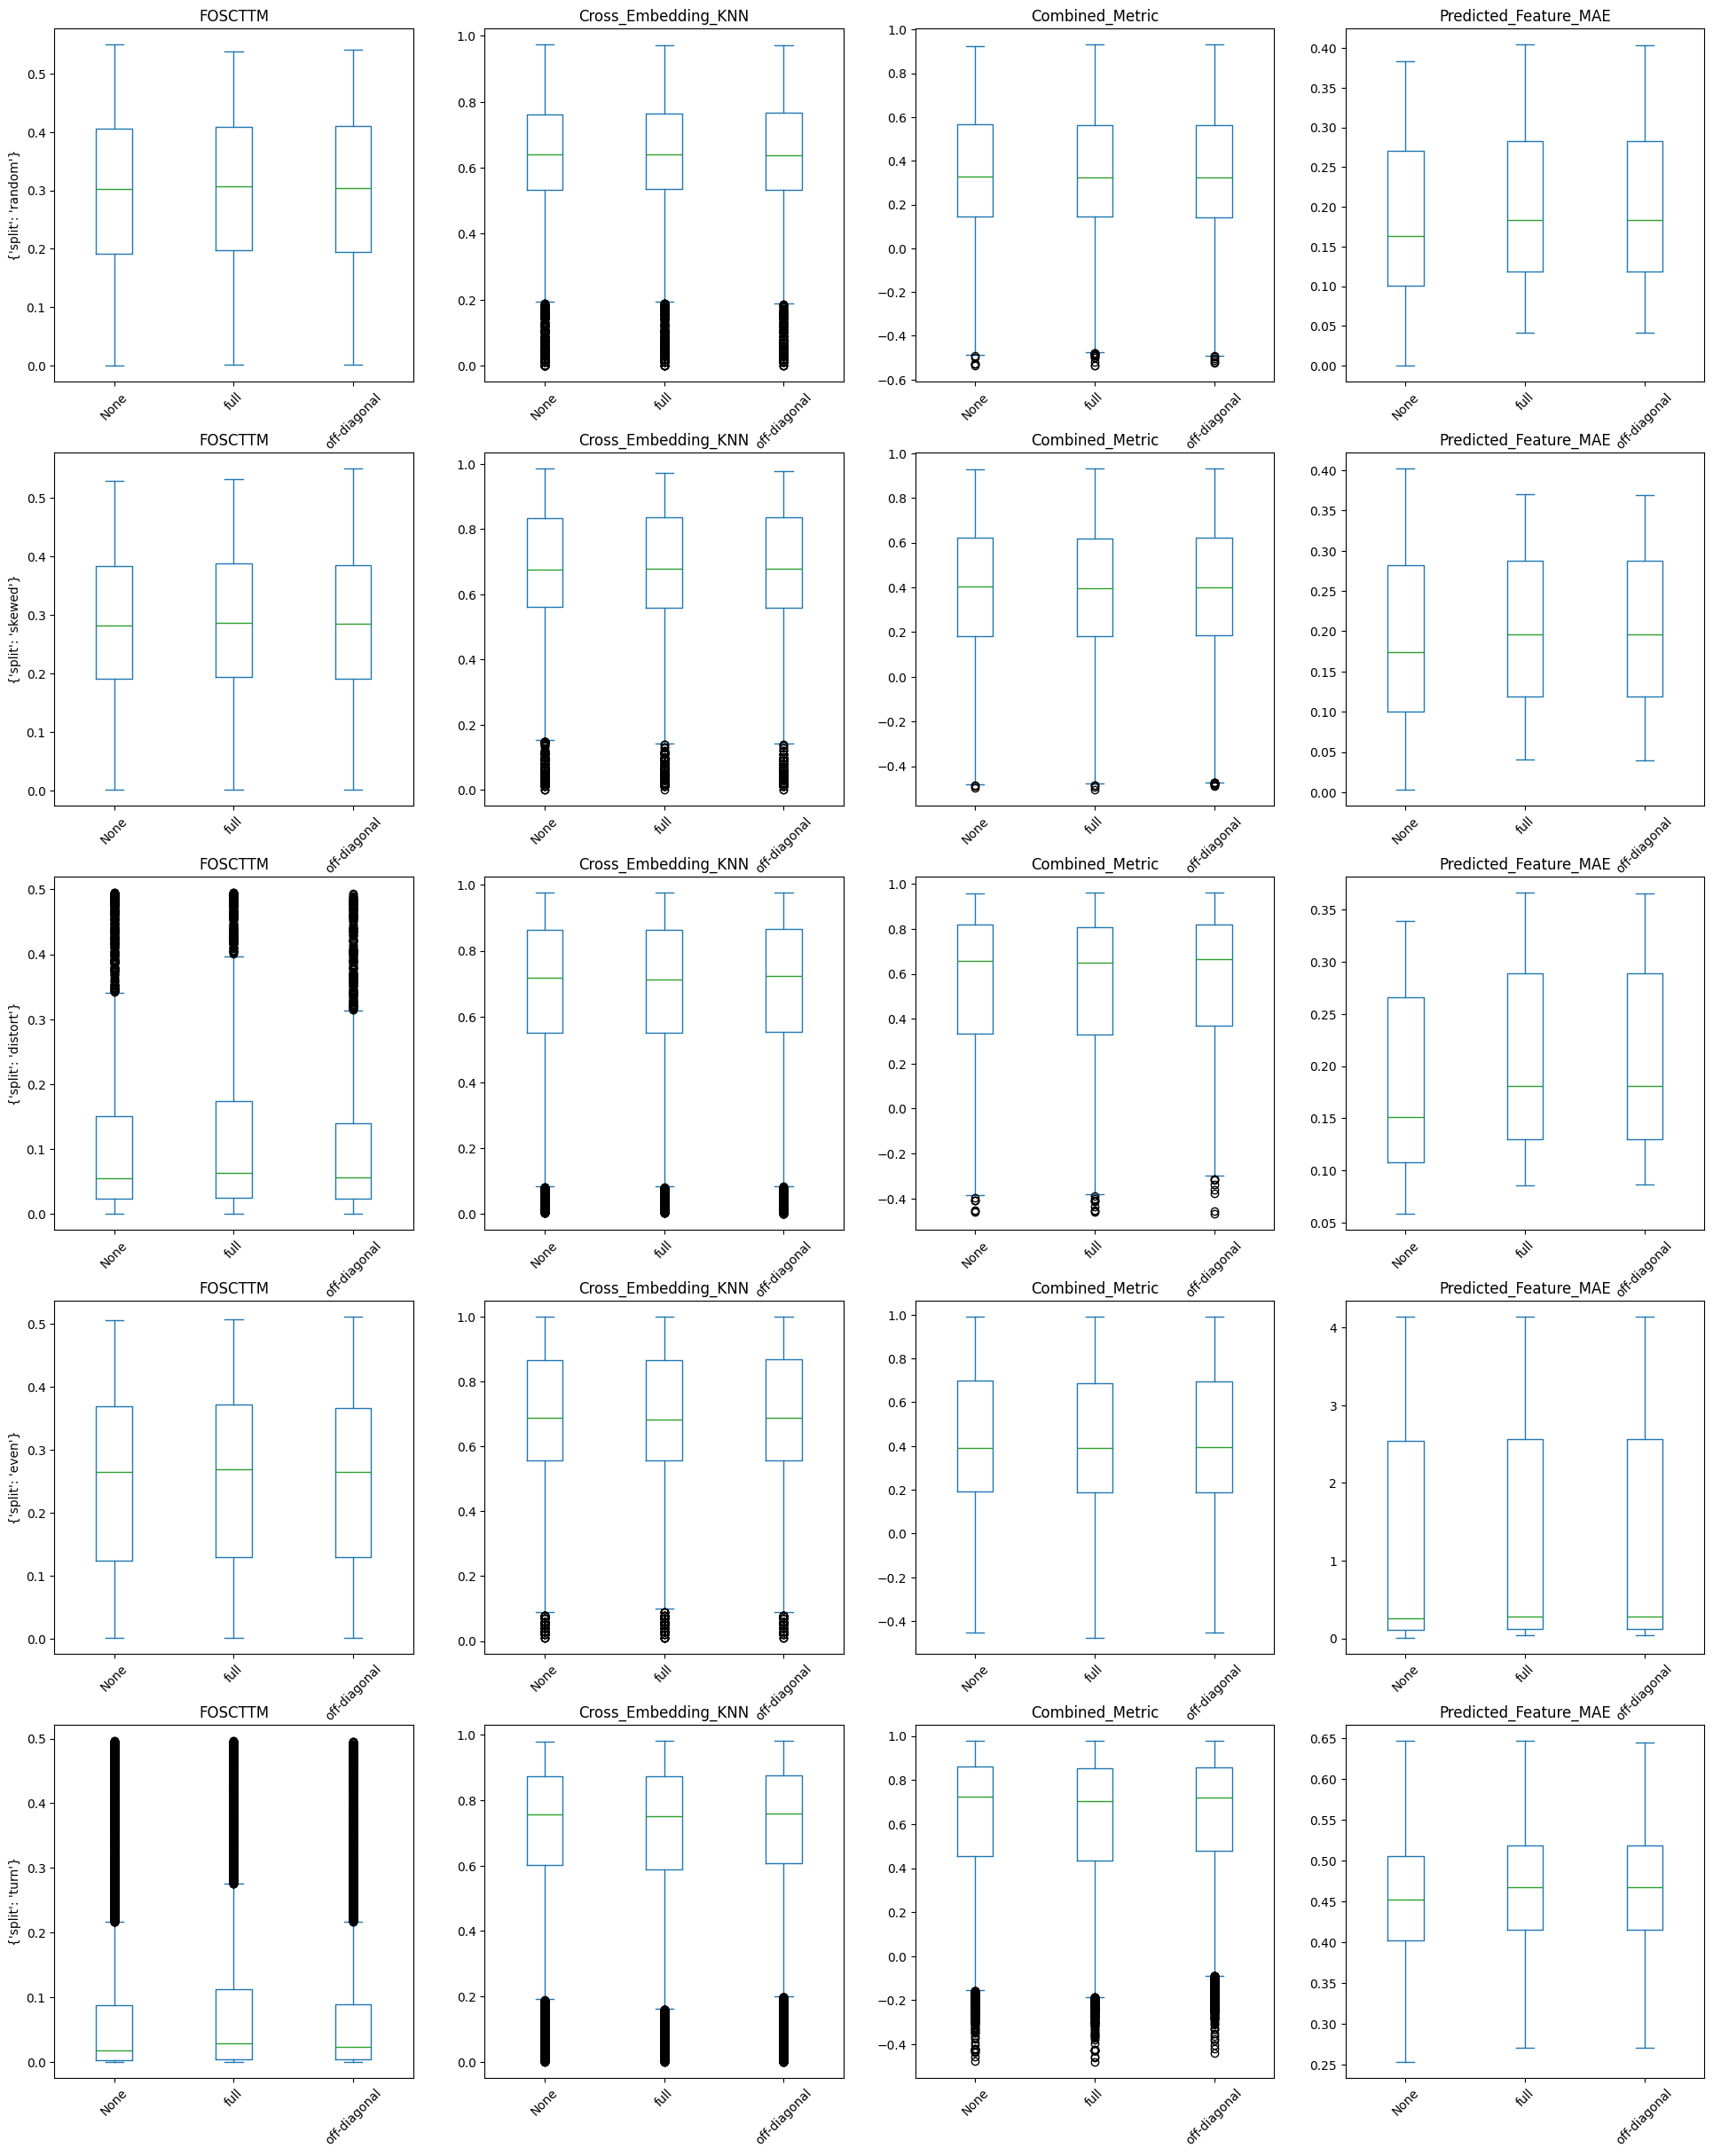

In [12]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

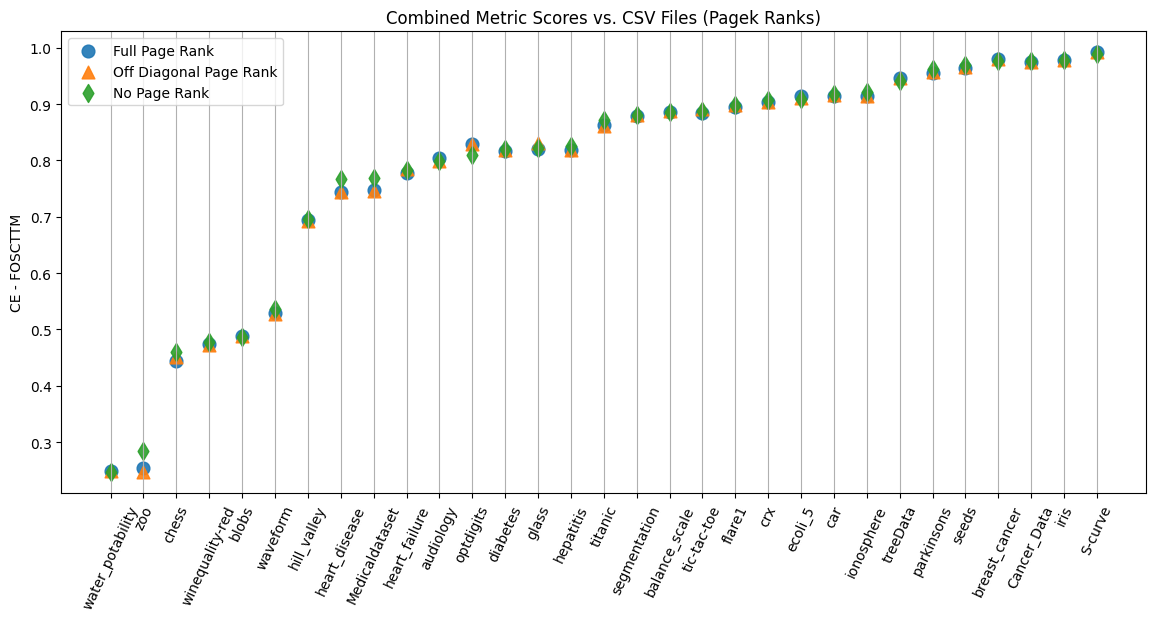

In [13]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

### SPUD

Notes:
1. Distance seems to be the best metric (This note was made when we only have iris data tested)

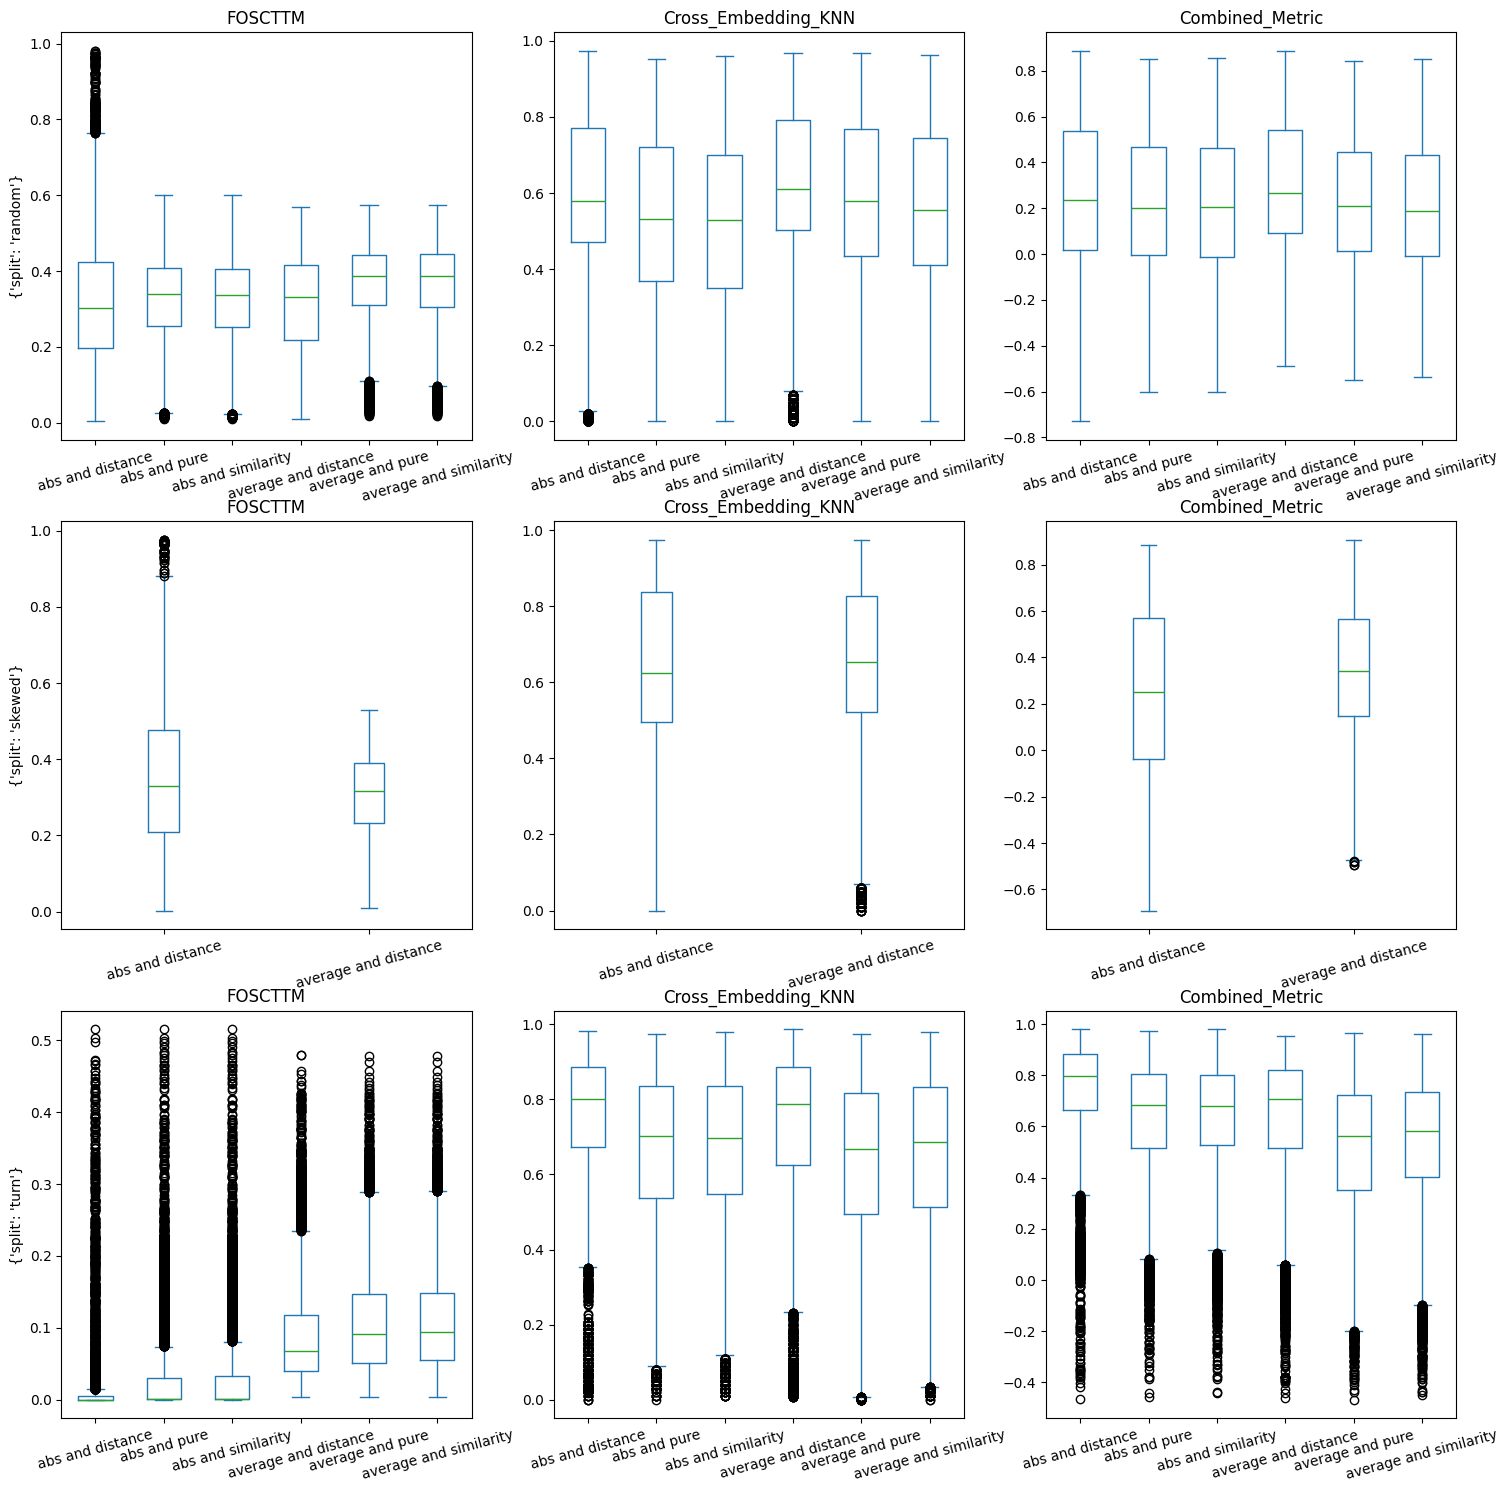

In [14]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine DIG argumenst
df_sub = df
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [15]:
def plt_methods_by_CSV_max(df = df, sort_by = "SPUD", return_df =False):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].max(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index,
                "s" : 84,
                "alpha" : .90}

    plt.figure(figsize=(16, 6))
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words) 
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MAX)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

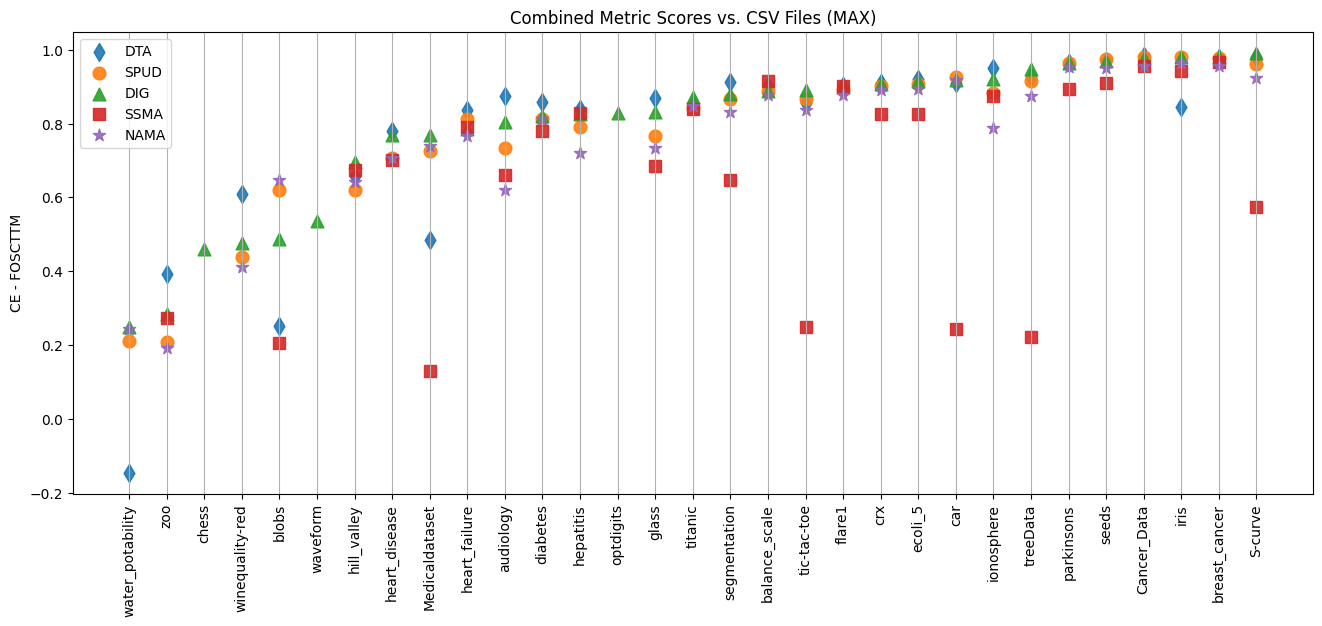

In [16]:
plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
#plt_methods_by_CSV_max(df = subset_df(df, split = "turn"), sort_by="DIG")

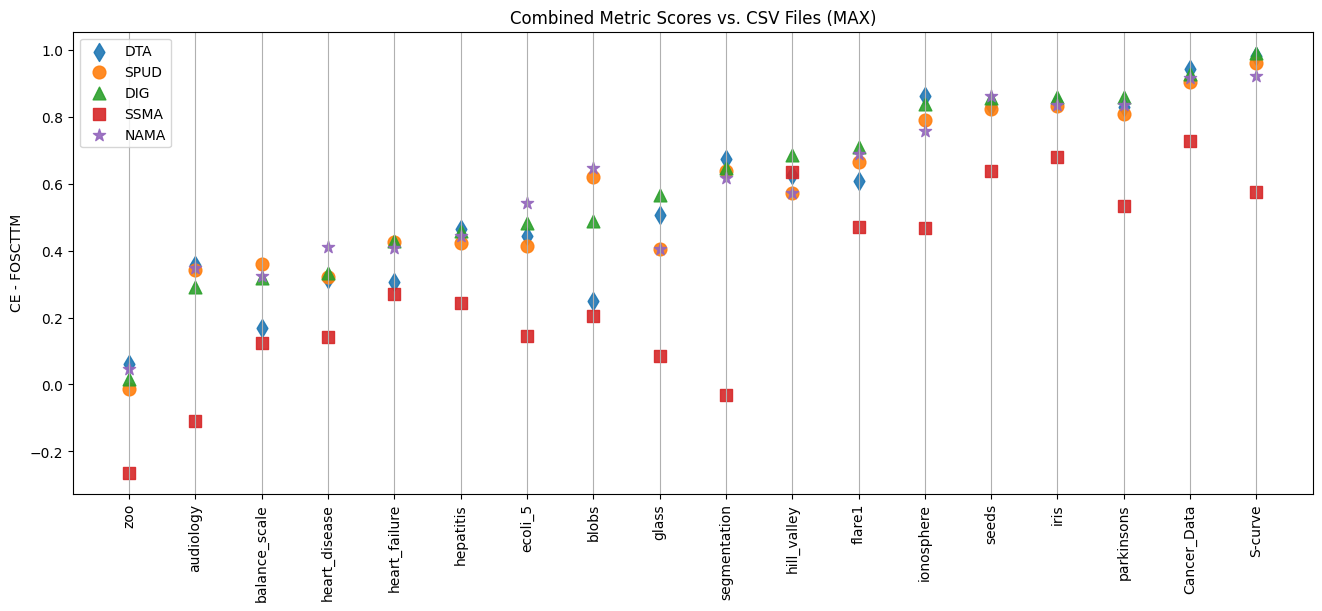

In [41]:
plt_methods_by_CSV_max(df = subset_df(df, split = "even"), sort_by="DIG")

In [18]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].std() *2,
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].std() *2 ,
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].std()*2,
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].std()*2,
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].std()*2
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = "d", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = "o", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '^', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = 's', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '*', label = "NAMA", **key_words)

    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MEAN)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

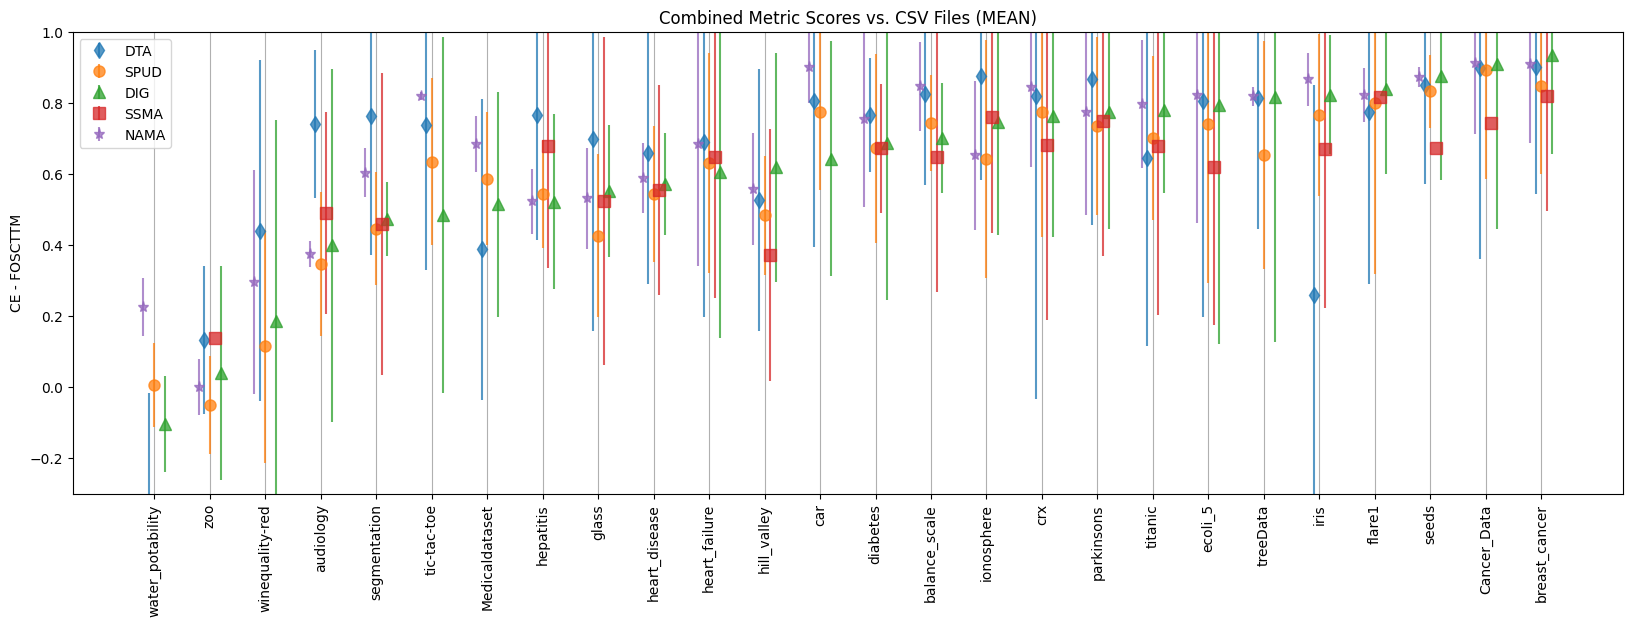

In [19]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "turn"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [20]:
def get_ranks(split = 'No'):
    #Sort by Split
    if split != "No":
        split_df = subset_df(df=df, split = split)
    else:
        split_df = df

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    df_ranked = csv_df.drop(columns= ["csv_file"]).rank(ascending=False, method='max', axis = 1)


    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0)}")
    print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0)}")
    print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.drop(columns= ['csv_file']).idxmax(axis = 1).value_counts()}")
    df_ranked

In [21]:
get_ranks()

Ranked across No Split
-----------------------
SSMA    4.153846
DTA     2.035714
SPUD    2.785714
DIG     1.967742
NAMA    3.892857
dtype: float64

 
STD of Ranks across No Split
----------------------------
SSMA    1.222859
DTA     1.261455
SPUD    1.031258
DIG     0.912282
NAMA    1.100144
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA     14
DIG     11
SPUD     4
NAMA     1
SSMA     1
Name: count, dtype: int64


In [22]:
get_ranks(split = "random")

Ranked across random Split
-----------------------
SSMA    4.833333
DTA     3.208333
SPUD    2.333333
DIG     1.703704
NAMA    2.833333
dtype: float64

 
STD of Ranks across random Split
----------------------------
SSMA    0.637022
DTA     1.178767
SPUD    1.239448
DIG     0.775332
NAMA    0.963087
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     13
SPUD     8
NAMA     3
DTA      3
Name: count, dtype: int64


In [23]:
get_ranks(split = "even")

Ranked across even Split
-----------------------
SSMA    4.833333
DTA     2.444444
SPUD    3.333333
DIG     1.888889
NAMA    2.500000
dtype: float64

 
STD of Ranks across even Split
----------------------------
SSMA    0.707107
DTA     1.247219
SPUD    0.970143
DIG     0.900254
NAMA    1.098127
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     7
DTA     6
NAMA    4
SPUD    1
Name: count, dtype: int64


In [24]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
SSMA    4.714286
DTA     2.809524
SPUD    3.476190
DIG     1.619048
NAMA    2.380952
dtype: float64

 
STD of Ranks across skewed Split
----------------------------
SSMA    0.783764
DTA     1.209093
SPUD    0.928388
DIG     0.669043
NAMA    1.160870
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     10
NAMA     7
DTA      4
Name: count, dtype: int64


In [25]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
SSMA    4.937500
DTA     1.250000
SPUD    2.461538
DIG     2.192308
NAMA    3.125000
dtype: float64

 
STD of Ranks across distort Split
----------------------------
SSMA    0.250000
DTA     1.000000
SPUD    0.989172
DIG     0.938903
NAMA    0.957427
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA     15
DIG      5
SPUD     5
NAMA     1
Name: count, dtype: int64


In [26]:
get_ranks(split = "turn")

Ranked across turn Split
-----------------------
SSMA    3.850000
DTA     1.961538
SPUD    2.807692
DIG     2.076923
NAMA    4.038462
dtype: float64

 
STD of Ranks across turn Split
----------------------------
SSMA    1.268028
DTA     1.248384
SPUD    1.059027
DIG     0.890980
NAMA    0.999230
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA     14
DIG      7
SPUD     4
SSMA     1
Name: count, dtype: int64


## Comparing Percent of anchors and KNN values

In [27]:
def line_plot_methods(argument = "Percent_of_Anchors", **kwargs):
    "subset should equal none or the csv file name"

    #Subset the data
    df_subset = subset_df(df, **kwargs)

    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)["Combined_Metric"].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)["Combined_Metric"].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)["Combined_Metric"].mean(), label = "DIG")

    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)["Combined_Metric"].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel("Combined Metric Score (CE - FOSCTTM)")
    plt.legend()
    plt.title("Methods Together")

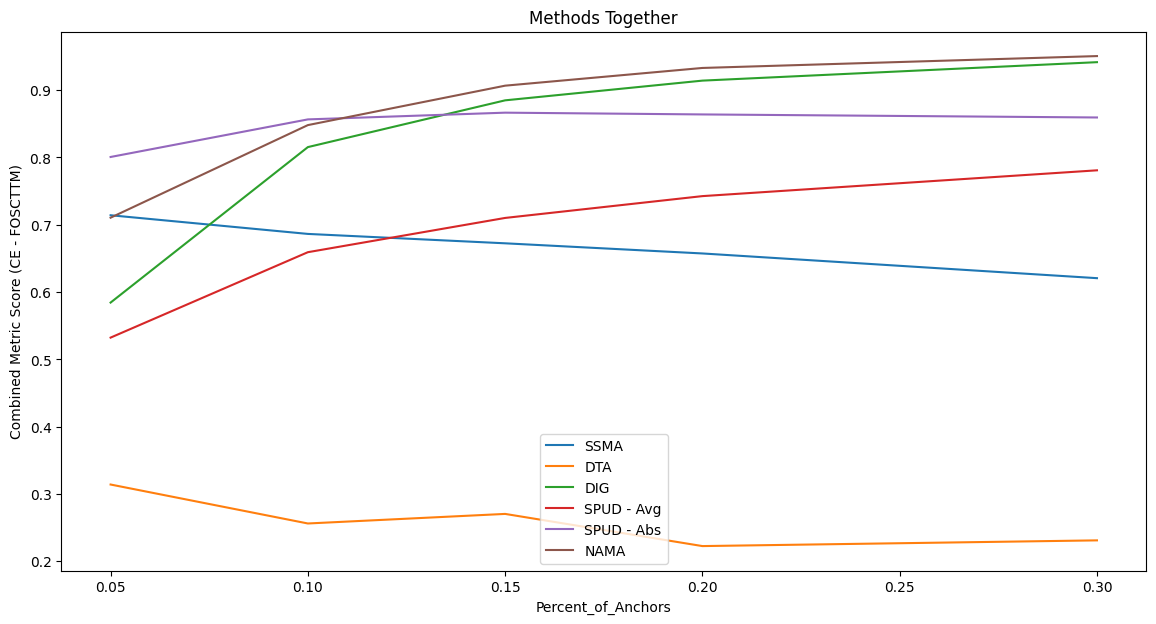

In [28]:
line_plot_methods(split = "turn", csv_file = "iris")

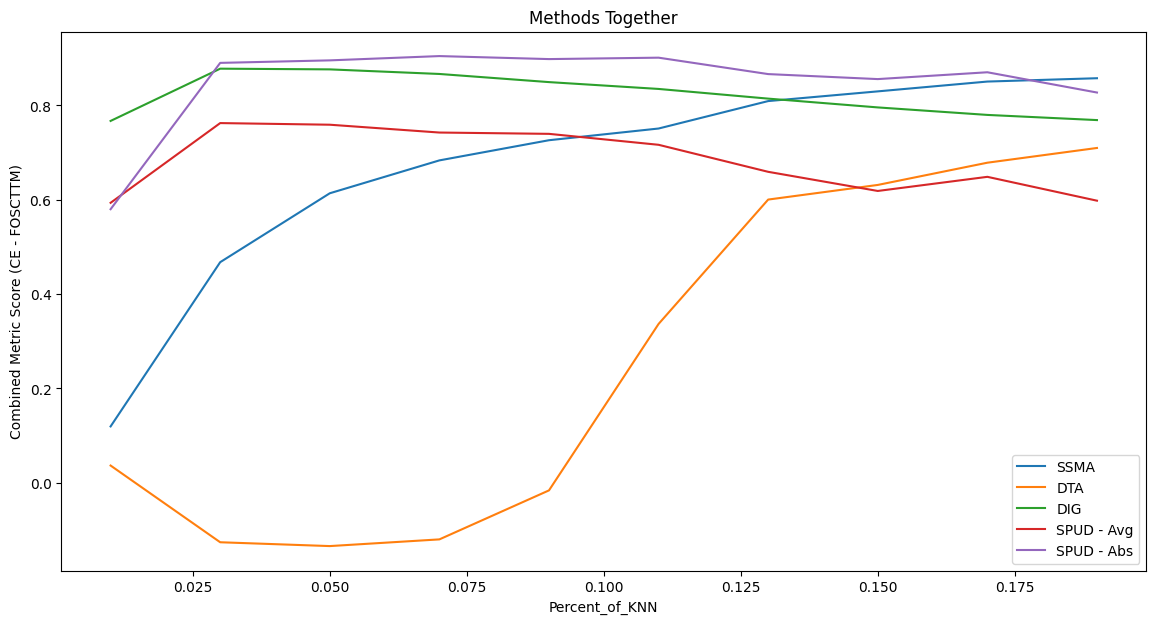

In [29]:
line_plot_methods(argument = "Percent_of_KNN", split = "turn", csv_file = "iris")

## Plotting the Embeddings

In [30]:
visual_test = tma.test_manifold_algorithms(csv_file="S-curve", split= "skewed", percent_of_anchors= [0.1, 0.25], verbose=2)


 
 
---------------------------       Initalizing class with S-curve data       ---------------------------

Creating swiss rolls and S curve data
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)


Percent of anchors used: 0.25
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


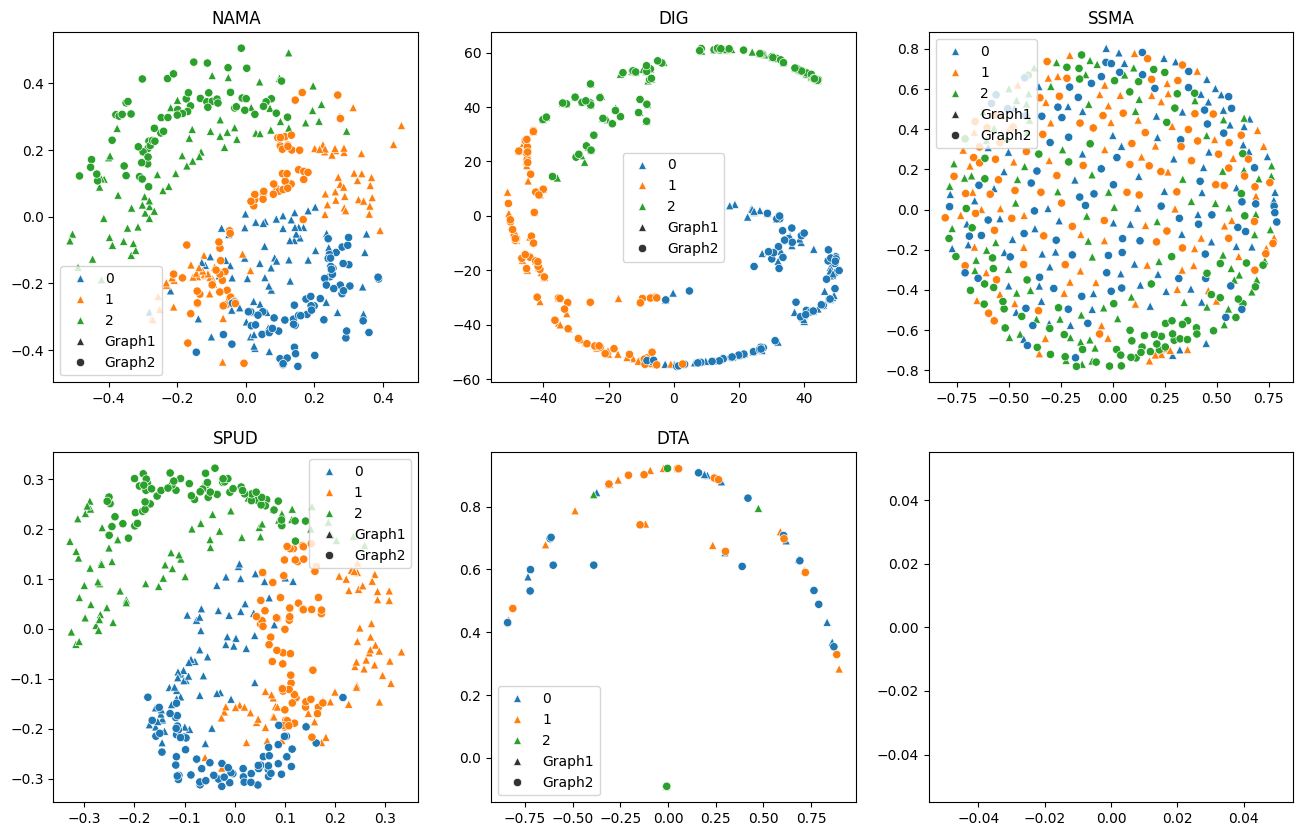

In [31]:
visual_test.plot_embeddings(knn = 5)

Percent of anchors used: 0.25
The amount of Nearest Neighbors: 48


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:747: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


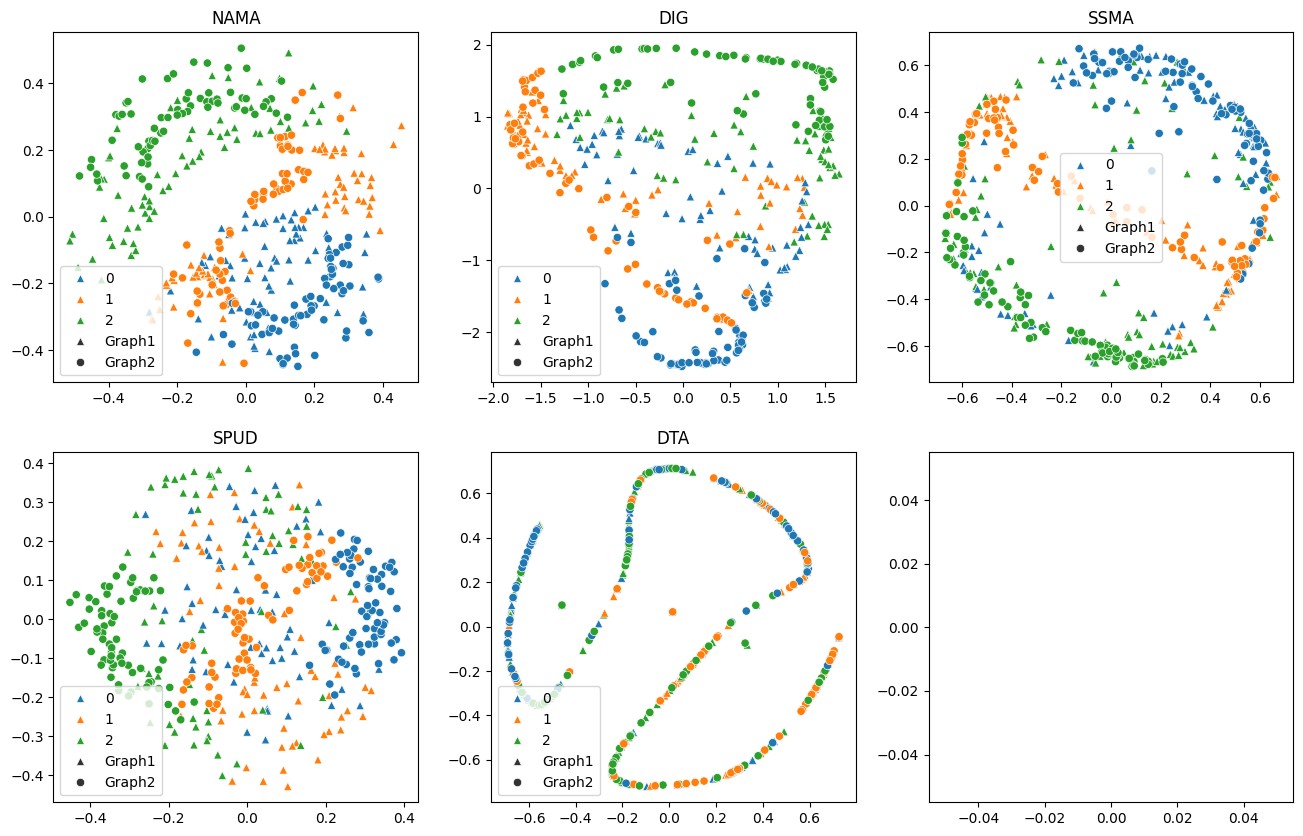

In [32]:
visual_test.plot_embeddings(knn = 48, operation = "abs")

# Debugging Tests Below

2024-05-20 09:07:49.380154: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 09:07:49.384090: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 09:07:49.430582: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 09:07:51.304838: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


MAGAN is running on TensorFlow 2.16.1

 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)
Batch 1 shape: (150, 2) Batch 2 shape: (150, 2)


2024-05-20 09:07:58.364640: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Losses: D G 0.689 0.237


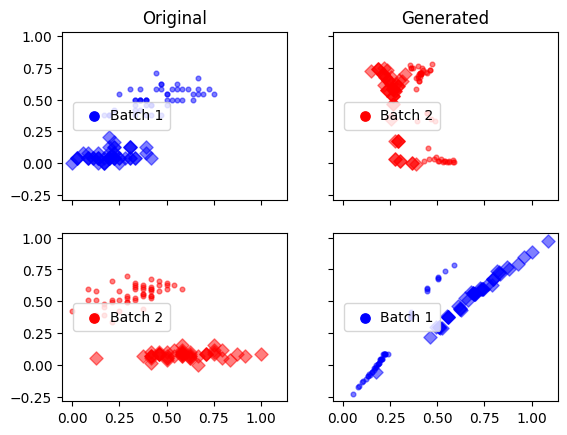

Losses: D G 0.624 0.247


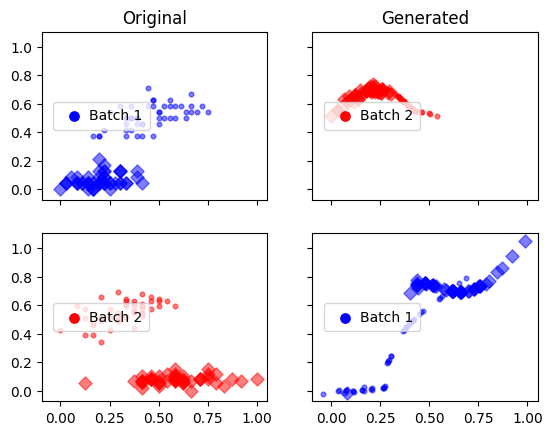

Losses: D G 0.602 0.304


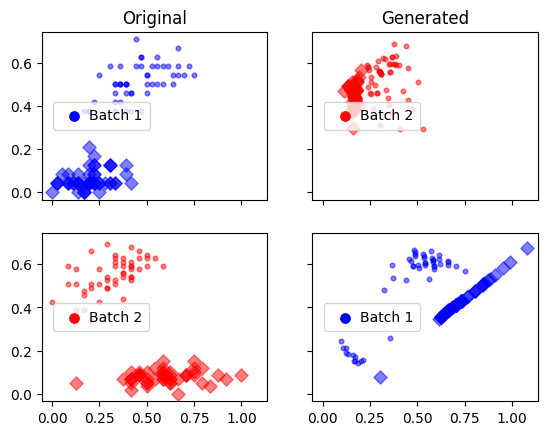

Losses: D G 0.542 0.375


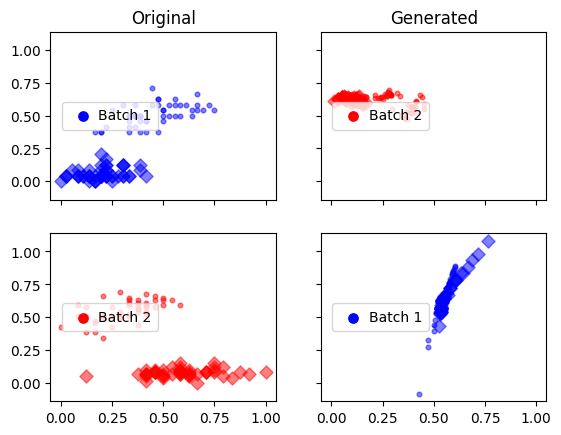

In [1]:
#MAGAN TRIALS - 
import MAGAN
import test_manifold_algorithms as tma
import numpy as np
test = tma.test_manifold_algorithms(csv_file="iris.csv", split = "even", percent_of_anchors = [0.05], random_state=42, verbose = 2)
#xb1 , xb2, labelsA, labelsB = MAGAN.get_data()

domain_a, domain_b, domain_ab, domain_ba = MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels)
#domain_a, domain_b, domain_ab, domain_ba = MAGAN.run_MAGAN(xb1, xb2, labelsA, labelsB)

In [8]:
domain_a, domain_b = MAGAN.get_pure_distance(domain_a, domain_b)
domain_ab, domain_ba = MAGAN.get_pure_distance(domain_ab, domain_ba)
magan_block = np.block([[domain_a, domain_ba],
                        [domain_ba, domain_b]])

In [9]:
test.FOSCTTM(domain_ab), test.FOSCTTM(domain_ba)

(0.0015555555555555557, 0.002444444444444445)

In [10]:
from sklearn.manifold import MDS
mds = MDS(metric=True, dissimilarity = 'precomputed', random_state = 42, n_components=2)
emb = mds.fit_transform(magan_block)

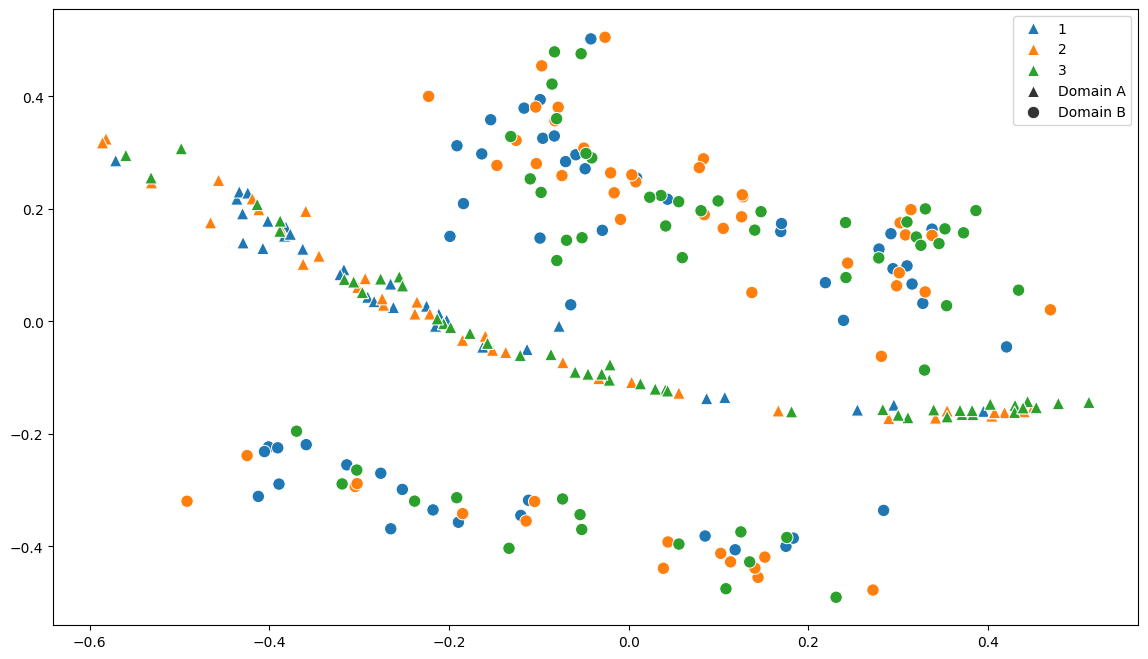

In [11]:
#Veiw the manifold. Those shown as Triangles are from GX
styles = ['Domain A' if i < len(emb[:]) / 2 else 'Domain B' for i in range(len(emb[:]))]

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = pd.Categorical(test.labels_doubled), style = styles, s=80, markers= {"Domain A": "^", "Domain B" : "o"})
#ax.scatter(emb[test.known_anchors_A, 0], emb[test_class.known_anchors_A, 1], s = 7, color = 'black')

In [12]:
len(emb), len(test.labels_doubled), len(domain_a), len(domain_ab) #Why are they not 150? -> it seems effected by batch sizes

(300, 300, 150, 150)

In [13]:
#Stress is a value of how well the emd did. Lower the better.
print(f"Our New Model Stress: {mds.stress_}")
test.cross_embedding_knn(emb, (test.labels, test.labels), knn_args = {'n_neighbors': 5})

Our New Model Stress: 806.6579701476213


0.4266666666666667